In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/sensors.csv', index_col=0)
names = [f'X{i}' for i in range(32)]
dfw = df[names]
dfw


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
2017-01-01 00:00:00+01:00,16.400000,16.300000,16.300000,16.300000,16.350000,16.400000,16.300000,16.300000,16.400000,16.500000,...,29.100000,34.400000,37.700000,39.250000,39.500000,39.500000,39.400000,39.500000,39.500000,39.300000
2017-01-01 01:00:00+01:00,16.400000,16.300000,16.316667,16.300000,16.400000,16.400000,16.300000,16.300000,16.400000,16.416667,...,29.100000,34.333333,37.700000,39.216667,39.500000,39.500000,39.400000,39.500000,39.500000,39.283333
2017-01-01 02:00:00+01:00,16.400000,16.300000,16.300000,16.300000,16.400000,16.400000,16.300000,16.300000,16.400000,16.450000,...,29.016667,34.300000,37.700000,39.233333,39.500000,39.500000,39.400000,39.500000,39.500000,39.283333
2017-01-01 03:00:00+01:00,16.300000,16.283333,16.300000,16.300000,16.400000,16.400000,16.300000,16.300000,16.400000,16.500000,...,29.000000,34.216667,37.650000,39.233333,39.500000,39.500000,39.400000,39.500000,39.500000,39.300000
2017-01-01 04:00:00+01:00,16.300000,16.200000,16.300000,16.300000,16.400000,16.400000,16.316667,16.300000,16.483333,16.500000,...,28.966667,34.200000,37.600000,39.200000,39.500000,39.500000,39.400000,39.500000,39.500000,39.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+01:00,12.583333,12.500000,12.583333,12.566667,12.650000,12.750000,12.700000,12.783333,13.016667,13.883333,...,15.500000,17.033333,18.916667,22.400000,26.150000,30.483333,33.700000,36.333333,36.600000,36.500000
2019-12-31 20:00:00+01:00,12.566667,12.600000,12.700000,12.633333,12.716667,12.800000,12.700000,12.800000,13.033333,13.700000,...,15.500000,17.000000,18.900000,22.366667,26.150000,30.433333,33.700000,36.300000,36.566667,36.500000
2019-12-31 21:00:00+01:00,12.633333,12.633333,12.700000,12.666667,12.766667,12.800000,12.800000,12.800000,12.983333,13.633333,...,15.500000,17.000000,18.883333,22.316667,26.083333,30.416667,33.650000,36.300000,36.516667,36.500000
2019-12-31 22:00:00+01:00,12.616667,12.683333,12.783333,12.700000,12.800000,12.883333,12.800000,12.833333,13.000000,13.566667,...,15.450000,17.000000,18.833333,22.316667,26.066667,30.383333,33.616667,36.300000,36.500000,36.500000


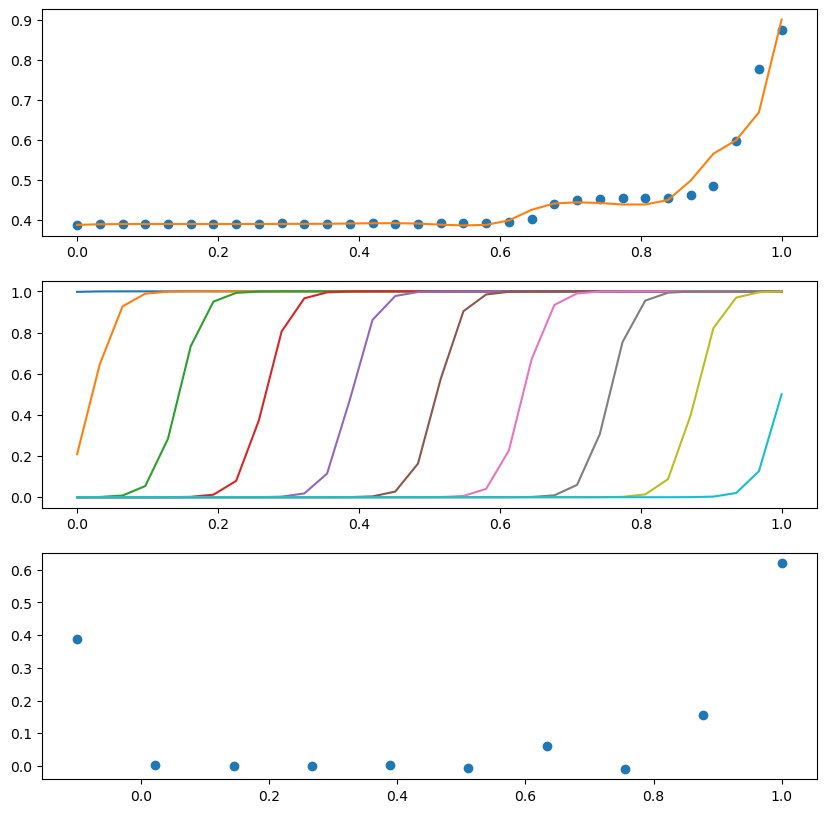

In [706]:
# basis function
def basis(x, i):
    return np.exp(-np.square(x - i) / 0.1)

def basis2(x,i):
    return np.maximum(0, 1 - np.abs(x-i))

def basis3(x,i):
    return np.maximum(0, 1 - np.abs(x-i)**3)

def basis4(x,i):
    return np.maximum(0, 1 - np.abs(x-i)**4)

def log_basis(x, i):
    return 1/(1+np.exp(-60*(x-i))) 

def spline_basis(x, t):
    return np.array([log_basis(x, i) for i in t]).T


idx = np.random.randint(0, len(dfw))
m = 10
x = np.linspace(0,1,32)

y = dfw.iloc[idx].values
y = (y-5)/(90-5)
t = np.linspace(-0.1,1,m)


A = spline_basis(x, t)

w = np.linalg.lstsq(A, y, rcond=None)[0]

fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].plot(x, y, 'o')
ax[0].plot(x, A @ w)

ax[1].plot(x, A)
ax[2].plot(t, w, 'o')

In [707]:
W = np.zeros((len(dfw), m))
for i in range(len(dfw)):
    y = dfw.iloc[i].values
    y = (y-5)/(90-5)
    w = np.linalg.lstsq(A, y, rcond=None)[0]
    W[i] = w

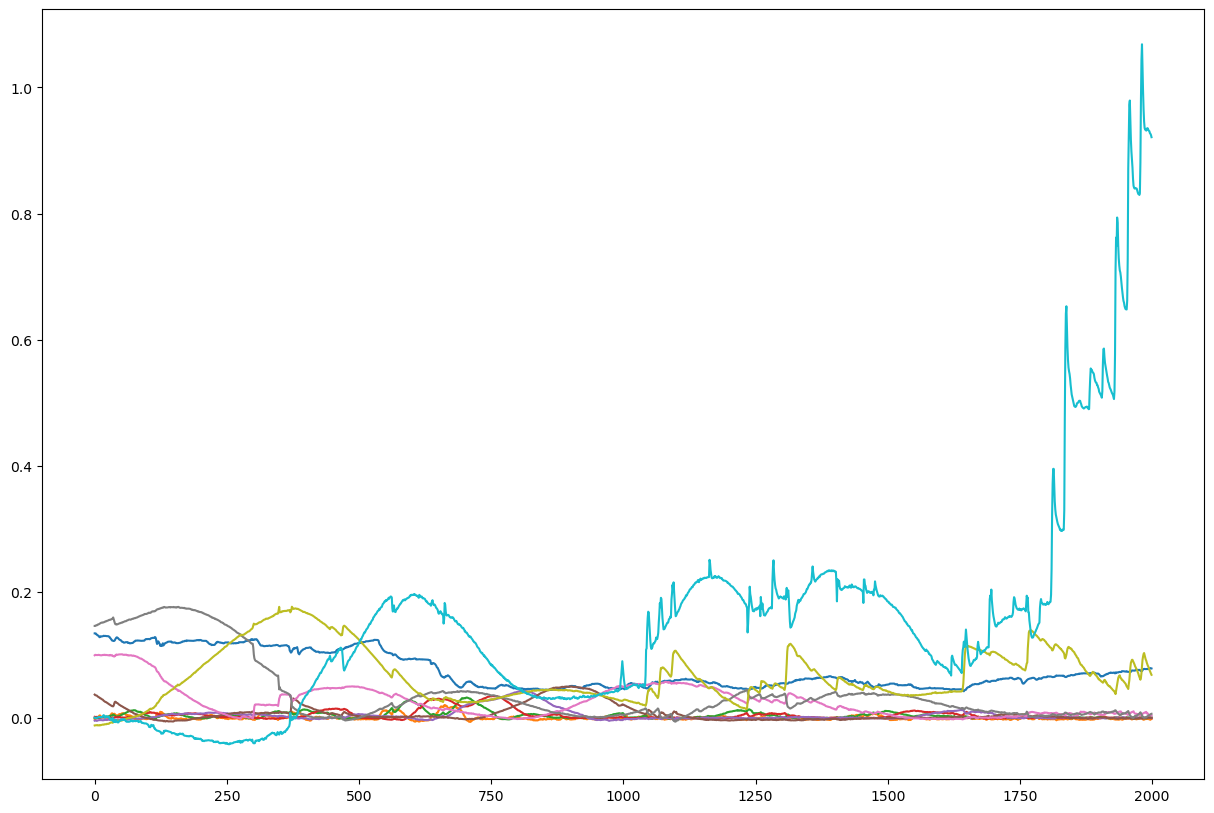

In [711]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(W[:2000])


In [305]:
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])